<a href="https://colab.research.google.com/github/Juhi-priya/Data_Analysis_Python/blob/main/Laptop_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Libraries

In [77]:
from collections import Counter
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ETree
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from imblearn.pipeline import Pipeline
from scipy.sparse import hstack, vstack
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


In [78]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
pip install nltk

 Parsing the file :  Two methods: 
             -> Beautiful Soup
             ->  using Element Tree 

In [81]:
import xml.etree.ElementTree as ET
root = ET.parse('Laptop_Train_v2.xml').getroot()
for type_tag in root.findall('aspectTerms'):
    value = type_tag.get('term')
from bs4 import BeautifulSoup
with open('Laptop_Train_v2.xml', 'r') as f:
    data = f.read()
Bs_data = BeautifulSoup(data, "xml")
A_unique = Bs_data.find_all('aspectTerms')
 
print(A_unique)

[<aspectTerms>
<aspectTerm from="41" polarity="neutral" term="cord" to="45"/>
<aspectTerm from="74" polarity="positive" term="battery life" to="86"/>
</aspectTerms>, <aspectTerms>
<aspectTerm from="27" polarity="negative" term="service center" to="41"/>
<aspectTerm from="109" polarity="negative" term='"sales" team' to="121"/>
<aspectTerm from="4" polarity="neutral" term="tech guy" to="12"/>
</aspectTerms>, <aspectTerms>
<aspectTerm from="14" polarity="positive" term="quality" to="21"/>
<aspectTerm from="36" polarity="positive" term="GUI" to="39"/>
<aspectTerm from="118" polarity="positive" term="applications" to="130"/>
<aspectTerm from="143" polarity="positive" term="use" to="146"/>
</aspectTerms>, <aspectTerms>
<aspectTerm from="8" polarity="positive" term="start up" to="16"/>
</aspectTerms>, <aspectTerms>
<aspectTerm from="46" polarity="positive" term="features" to="54"/>
<aspectTerm from="77" polarity="positive" term="iChat" to="82"/>
<aspectTerm from="84" polarity="positive" term=

In [82]:
xmldata = "Laptop_Train_v2.xml"
prstree = ETree.parse(xmldata)
root = prstree.getroot()
  
store_items = []
all_items = []
  
for review in root.iter('sentence'):
    sid = review.attrib.get('id')
    text = review.find('text').text
    node2=ETree.Element("root")
    node2=(review)
    
    for at in node2.iter("aspectTerm"):
          term= at.attrib.get('term')
          polarity = at.attrib.get('polarity')
          start=at.attrib.get('from')
          end=at.attrib.get('to')
          store_items = [sid,text,term,polarity,start,end]
          all_items.append(store_items)

Df = pd.DataFrame(all_items, columns=[
  'ID', 'Text', 'Term', 'Polarity', 'From','To'])

Analysing Data 

In [83]:
Df.shape

(2358, 6)

In [84]:
Df.describe()

,ID,Text,Term,Polarity,From,To
count,2358,2358,2358,2358,2358,2358
unique,1488,1482,1042,4,202,202
top,453,There are several programs for school or offic...,screen,positive,4,12
freq,13,13,58,987,177,48


In [85]:
Df[Df['ID'] == '1316']

,ID,Text,Term,Polarity,From,To
2,1316,The tech guy then said the service center does...,service center,negative,27,41
3,1316,The tech guy then said the service center does...,"""sales"" team",negative,109,121
4,1316,The tech guy then said the service center does...,tech guy,neutral,4,12


In [40]:
Df.head(6)

,ID,Text,Term,Polarity,From,To
0,2339,I charge it at night and skip taking the cord ...,cord,neutral,41,45
1,2339,I charge it at night and skip taking the cord ...,battery life,positive,74,86
2,1316,The tech guy then said the service center does...,service center,negative,27,41
3,1316,The tech guy then said the service center does...,"""sales"" team",negative,109,121
4,1316,The tech guy then said the service center does...,tech guy,neutral,4,12
5,2005,"it is of high quality, has a killer GUI, is ex...",quality,positive,14,21


In [41]:
Df["Polarity"].value_counts()

positive    987
negative    866
neutral     460
conflict     45
Name: Polarity, dtype: int64

Checking For DAta Balance

In [42]:
counter = Counter(Df["Polarity"])
print(counter)

Counter({'positive': 987, 'negative': 866, 'neutral': 460, 'conflict': 45})


[]

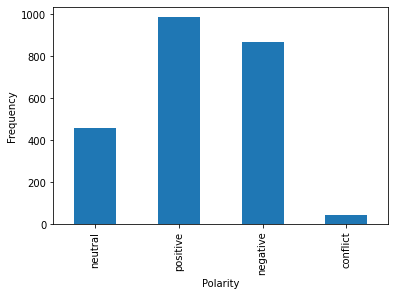

In [43]:
plt.ylabel('Frequency')
plt.xlabel('Polarity')
c = pd.Series(list(counter.values()), index = list(counter.keys()) )
ax = plt.gca()
c.plot.bar()
plt.plot()

In [44]:
s=[]
for term in Df["Term"]:
   s.append(term)

In [45]:
s

['cord',
 'battery life',
 'service center',
 '"sales" team',
 'tech guy',
 'quality',
 'GUI',
 'applications',
 'use',
 'start up',
 'features',
 'iChat',
 'Photobooth',
 'garage band',
 'features',
 'GUI',
 'screen',
 'power light',
 'hard drive light',
 'battery',
 'rubber enclosure',
 'edge',
 'multi-touch gestures',
 'tracking area',
 'external mouse',
 'gaming',
 'suite of software',
 'speed',
 'Windows 7',
 'usb devices',
 'keyboard',
 'software',
 'system',
 'Microsoft office for the mac',
 'syncing',
 '30" HD Monitor',
 'screen',
 'boot up',
 'service',
 'battery',
 'operating system',
 'preloaded software',
 'price',
 'features',
 'clock in BIOS setup',
 'WARRANTY SERVICE',
 'brand',
 'warranty',
 'features',
 'fan',
 'Customer Service number',
 'warranty',
 'talking to a technician',
 'hard disc',
 'windows',
 'drivers',
 'Drivers',
 'BIOS update',
 'system',
 'HP Technical Support',
 'browser',
 'keyboard',
 'virus scan',
 '9 punds',
 'program',
 'warrenty',
 'Toshiba Warra

In [46]:
len(s)

2358

In [87]:
X=Df[['Text',"Term"]]
Y=Df['Polarity']

In [88]:
X[0:4]

,Text,Term
0,I charge it at night and skip taking the cord ...,cord
1,I charge it at night and skip taking the cord ...,battery life
2,The tech guy then said the service center does...,service center
3,The tech guy then said the service center does...,"""sales"" team"


Preprocessing : lemmetization, Convert to lower case, removing stop words, numerics, steaming (keeping roots of morphological variants)

In [89]:
ps=PorterStemmer()

In [90]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)  # Return the list of syllables of words.
    # text will get lower case   
    y=[]
    for i in text:
        if i.isalnum(): # checking if all characters in the string are alphanumeric (either alphabets or numbers)
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))  # ps.stem is the process of producing morphological variants of a root/base word.
            
    return " ".join(y)

In [92]:
X['Text_']=X.Text.apply(transform_text)
X['Term_']=X.Term.apply(transform_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
X.head()

,Text,Term,Text_,Term_
0,I charge it at night and skip taking the cord ...,cord,charg night skip take cord good batteri life,cord
1,I charge it at night and skip taking the cord ...,battery life,charg night skip take cord good batteri life,batteri life
2,The tech guy then said the service center does...,service center,tech guy said servic center exchang direct con...,servic center
3,The tech guy then said the service center does...,"""sales"" team",tech guy said servic center exchang direct con...,sale team
4,The tech guy then said the service center does...,tech guy,tech guy said servic center exchang direct con...,tech guy


In [94]:
Y[0:4]

0     neutral
1    positive
2    negative
3    negative
Name: Polarity, dtype: object

In [95]:
X=X.drop('Term',axis=1)
X=X.drop('Text',axis=1)
X.head(2)

,Text_,Term_
0,charg night skip take cord good batteri life,cord
1,charg night skip take cord good batteri life,batteri life


VECTORIZING Words 

In [96]:
word_vectorizer = CountVectorizer(
    #sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 2),
    max_features=1000)

char_vectorizer = CountVectorizer(
    #sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(2, 6),
    max_features=30000
    )

In [97]:
word_vectorizer.fit(X["Term_"])
char_vectorizer.fit(X["Term_"])


def feature_conversion(trainX):
  train_word_feat = word_vectorizer.transform(trainX)
  train_char_feat = char_vectorizer.transform(trainX)
  return hstack([train_word_feat, train_char_feat])

Split data into test train as per 80-20 Rule

In [98]:
X = feature_conversion(X["Term_"])


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1886, 11925) (1886,)
Test set: (472, 11925) (472,)


In [101]:
X_train

<1886x11925 sparse matrix of type '<class 'numpy.longlong'>'
	with 52065 stored elements in Compressed Sparse Row format>

In [60]:
Y.unique()

array(['neutral', 'positive', 'negative', 'conflict'], dtype=object)

BAG of Words

In [62]:
t=Df.Term.apply(transform_text)

In [63]:
t

0                               cord
1                       batteri life
2                      servic center
3                          sale team
4                           tech guy
                    ...             
2353    window server enterpris 2003
2354    window server 2008 enterpris
2355                          repair
2356                          repair
2357                     oper system
Name: Term, Length: 2358, dtype: object

In [64]:
vectorizer = CountVectorizer(stop_words='english')
Xnew = vectorizer.fit_transform(t)
d = pd.DataFrame(Xnew.toarray(),columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
#d = d.iloc[: , 20:]
d.tail(9)

,abilitiy,ac,access,accessori,acer,action,activ,ad,adapt,adob,aero,aesthet,afford,aftereffect,aftermarket,agent,aluminum,amd,analysi,antivir,antiviru,app,appear,appl,applecar,applework,applic,arcad,area,arm,art,aspect,assist,associ,assur,asu,ati,audio,background,backlit,...,use,user,valu,velcro,version,versitil,vga,vh,video,videocard,viewer,viru,visa,vista,visual,vmware,volum,wall,ware,warranti,warrenti,watch,web,webcam,webpag,weigh,weight,wheel,wifi,win,win7,window,wire,wireless,word,work,wt,xp,year,zoom
2349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


IF-IDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [67]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(t)


In [68]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
    print(ele1, ':', ele2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



idf values:
12 : 8.07284589884773
13 : 8.07284589884773
15 : 7.667380790739565
16 : 8.07284589884773
16gb : 8.07284589884773
17 : 7.1565551669735745
1gb : 8.07284589884773
2003 : 7.667380790739565
2008 : 8.07284589884773
22 : 8.07284589884773
2big : 8.07284589884773
2gb : 7.667380790739565
30 : 8.07284589884773
3g : 8.07284589884773
4gb : 7.667380790739565
500gb : 7.667380790739565
5850 : 8.07284589884773
800 : 8.07284589884773
8gb : 7.667380790739565
9800 : 8.07284589884773
abilitiy : 8.07284589884773
ac : 7.667380790739565
access : 7.667380790739565
accessori : 8.07284589884773
acer : 7.667380790739565
action : 8.07284589884773
activ : 8.07284589884773
ad : 8.07284589884773
adapt : 7.379698718287784
adob : 7.379698718287784
aero : 8.07284589884773
aesthet : 8.07284589884773
afford : 8.07284589884773
aftereffect : 8.07284589884773
aftermarket : 8.07284589884773
agent : 7.667380790739565
aluminum : 7.379698718287784
amd : 8.07284589884773
analysi : 8.07284589884773
antivir : 8.0728458

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns



Multiclass - Logistic Regression Classification : Presenting the result with Confusion Matrix. Accuracy

              precision    recall  f1-score   support

    conflict     0.0000    0.0000    0.0000         8
    negative     0.4808    0.4412    0.4601       170
     neutral     1.0000    0.0120    0.0238        83
    positive     0.5270    0.7867    0.6312       211

    accuracy                         0.5127       472
   macro avg     0.5019    0.3100    0.2788       472
weighted avg     0.5846    0.5127    0.4521       472

0.5127118644067796
[[  0   2   0   6]
 [  0  75   0  95]
 [  0  34   1  48]
 [  0  45   0 166]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[]

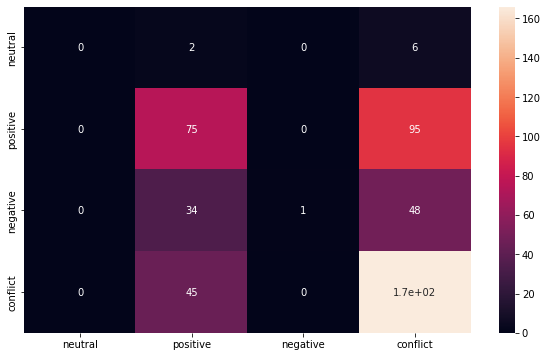

In [102]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)

#train_x, dev_x, train_y, dev_y = train_test_split(X_train, label_, test_size=0.1, shuffle=True)

cm = confusion_matrix(y_test, yhat)
print(classification_report(y_test, yhat , digits=4))
print(accuracy_score(y_test, yhat))
print(cm)

columns = index = Y.unique()
cm_df = pd.DataFrame(cm, columns, index)                  
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True)
plt.plot()